In [311]:
# import de todas las librerias que usaremos
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
import math
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
from pandas import json_normalize
import requests
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [312]:
pokemon = pd.read_csv('dataset\pokemon.csv')

In [313]:
pokemon

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,101,30720,0,570,25,Launch Pokémon,103,1250000,9.2,97,Tekkaguyaテッカグヤ,Celesteela,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,59,Kamiturugiカミツルギ,Kartana,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,223,Akuzikingアクジキング,Guzzlord,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,97,Necrozmaネクロズマ,Necrozma,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [314]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [315]:
pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [316]:
# Hacemos una primera limpieza del dataset
pokemon.drop(columns=["japanese_name","percentage_male","classfication"], inplace=True)

In [317]:
pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'defense', 'experience_growth', 'height_m', 'hp', 'name',
       'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2',
       'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

In [318]:
# Reordenamos columnas
pokemon = pokemon.loc[:,['pokedex_number','name','type1', 'type2','abilities', 'generation', 'is_legendary',
                         'attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed',
                         'against_bug', 'against_dark', 'against_dragon','against_electric',
                         'against_fairy', 'against_fight', 'against_fire','against_flying',
                         'against_ghost', 'against_grass', 'against_ground','against_ice', 
                         'against_normal', 'against_poison', 'against_psychic', 
                         'against_rock', 'against_steel', 'against_water', 
                         'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 
                          'experience_growth','height_m','weight_kg'
                        ]]

In [319]:
# Re nombramos algunas columnas para que sea mas claro
pokemon.rename(columns={"type1":"Base_type","type2":"Secondary_type","is_legendary":"Legendary","classfication":"Pokedex_class"},inplace=True)

In [320]:
# Capitalizamos las columnas
pokemon.columns = map(lambda x: str(x).capitalize(),pokemon.columns)

In [321]:
pokemon

,Pokedex_number,Name,Base_type,Secondary_type,Abilities,Generation,Legendary,Attack,Defense,Hp,Sp_attack,Sp_defense,Speed,Against_bug,Against_dark,Against_dragon,Against_electric,Against_fairy,Against_fight,Against_fire,Against_flying,Against_ghost,Against_grass,Against_ground,Against_ice,Against_normal,Against_poison,Against_psychic,Against_rock,Against_steel,Against_water,Base_egg_steps,Base_happiness,Base_total,Capture_rate,Experience_growth,Height_m,Weight_kg
0,1,Bulbasaur,grass,poison,"['Overgrow', 'Chlorophyll']",1,0,49,49,45,65,65,45,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120,70,318,45,1059860,0.7,6.9
1,2,Ivysaur,grass,poison,"['Overgrow', 'Chlorophyll']",1,0,62,63,60,80,80,60,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120,70,405,45,1059860,1.0,13.0
2,3,Venusaur,grass,poison,"['Overgrow', 'Chlorophyll']",1,0,100,123,80,122,120,80,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120,70,625,45,1059860,2.0,100.0
3,4,Charmander,fire,NaN,"['Blaze', 'Solar Power']",1,0,52,43,39,60,50,65,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,5120,70,309,45,1059860,0.6,8.5
4,5,Charmeleon,fire,NaN,"['Blaze', 'Solar Power']",1,0,64,58,58,80,65,80,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,5120,70,405,45,1059860,1.1,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,steel,flying,['Beast Boost'],7,1,101,103,97,107,101,61,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,30720,0,570,25,1250000,9.2,999.9
797,798,Kartana,grass,steel,['Beast Boost'],7,1,181,131,59,59,31,109,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,30720,0,570,255,1250000,0.3,0.1
798,799,Guzzlord,dark,dragon,['Beast Boost'],7,1,101,53,223,97,53,43,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,30720,0,570,15,1250000,5.5,888.0
799,800,Necrozma,psychic,NaN,['Prism Armor'],7,1,107,101,97,127,89,79,2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,30720,0,600,3,1250000,2.4,230.0


In [322]:
# No tenemos duplicados
pokemon["Name"].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
796    False
797    False
798    False
799    False
800    False
Name: Name, Length: 801, dtype: bool

In [323]:
# Miramos si hay nulls
pokemon.isnull().sum()

Pokedex_number         0
Name                   0
Base_type              0
Secondary_type       384
Abilities              0
Generation             0
Legendary              0
Attack                 0
Defense                0
Hp                     0
Sp_attack              0
Sp_defense             0
Speed                  0
Against_bug            0
Against_dark           0
Against_dragon         0
Against_electric       0
Against_fairy          0
Against_fight          0
Against_fire           0
Against_flying         0
Against_ghost          0
Against_grass          0
Against_ground         0
Against_ice            0
Against_normal         0
Against_poison         0
Against_psychic        0
Against_rock           0
Against_steel          0
Against_water          0
Base_egg_steps         0
Base_happiness         0
Base_total             0
Capture_rate           0
Experience_growth      0
Height_m              20
Weight_kg             20
dtype: int64

In [324]:
# Guardamos en una lista el nombre de cada pokemon para scrapear
names = list(pokemon["Name"])

In [325]:
# Intentamos scrapear los precios de las cartas en Cardmarket
def pokemon_prices():
    PATH=("C:\Program Files (x86)\chromedriver.exe")
    driver=webdriver.Chrome(PATH)
    driver.maximize_window()
    driver.get("https://www.cardmarket.com/es/Pokemon")
    time.sleep(2)
    driver.find_element_by_xpath('//*[@id="ProductSearchInput"]').click()
    time.sleep(1)
    price = []
    for i in range(len(names)):
        # Usamos este try except para los captchas. Si encuentra captcha cierra y vuelve a abrir donde se habia quedado
        try:
            # Buscamos el nombre del pokemon
            search=driver.find_element_by_id("ProductSearchInput")
            search.send_keys(names[i])
            search.send_keys(Keys.ENTER)
            time.sleep(2)

            # Clickamos el dropdown 
            driver.find_element_by_xpath('//*[@id="labelExtraFilters"]/div/button').click()
            time.sleep(1)

            # Seleccionamos del dropdown solo las Raras
            menu = driver.find_element(By.NAME, "idRarity")
            select_menu = Select(menu)
            select_menu.select_by_value("48")
            time.sleep(3)
            driver.find_element_by_xpath('/html/body/main/section/div[1]/form/div/div[6]/input').click()
            time.sleep(3)

            # Usamos un try except para si encuentra un precio lo añada, sino añada que no existe para ese tipo de rareza de la carta
            try:
                
                # Esta condicion nos permite seleccionar el precio en funcion de la clase
                # ya que cabe la posibilidad de que al buscar el pokemon nos lleve directo a una carta o que ese pokemon tengo varias cartas
                if len(driver.find_elements(By.CLASS_NAME, 'col-price'))>0:
                    precio = driver.find_elements(By.CLASS_NAME,"col-price")[1].text
                    price.append(precio)
                    print(names[i])

                else:    
                    precio = driver.find_element_by_xpath('//*[@id="tabContent-info"]/div/div[1]/div/div[2]/dl/dd[8]/span').text
                    price.append(precio)
                    print(names[i])
            except:

                price.append("No hay")
        except:
            driver.close()
            PATH=("C:\Program Files (x86)\chromedriver.exe")
            driver=webdriver.Chrome(PATH)
            driver.maximize_window()
            driver.get("https://www.cardmarket.com/es/Pokemon")
            time.sleep(2)
            driver.find_element_by_xpath('//*[@id="ProductSearchInput"]').click()
            time.sleep(1)
             # Buscamos el nombre del pokemon
            search=driver.find_element_by_id("ProductSearchInput")
            search.send_keys(names[i])
            search.send_keys(Keys.ENTER)
            time.sleep(2)

            # Clickamos el dropdown 
            driver.find_element_by_xpath('//*[@id="labelExtraFilters"]/div/button').click()
            time.sleep(1)

            # Seleccionamos del dropdown solo las Raras
            menu = driver.find_element(By.NAME, "idRarity")
            select_menu = Select(menu)
            select_menu.select_by_value("48")
            time.sleep(3)
            driver.find_element_by_xpath('/html/body/main/section/div[1]/form/div/div[6]/input').click()
            time.sleep(3)

            try:
                
                # Esta condicion nos permite seleccionar el precio en funcion de la clase
                # ya que cabe la posibilidad de que al buscar el pokemon nos lleve directo a una carta o que ese pokemon tengo varias cartas
                if len(driver.find_elements(By.CLASS_NAME, 'col-price'))>0:
                    precio = driver.find_elements(By.CLASS_NAME,"col-price")[1].text
                    price.append(precio)
                    print(names[i])

                else:    
                    precio = driver.find_element_by_xpath('//*[@id="tabContent-info"]/div/div[1]/div/div[2]/dl/dd[8]/span').text
                    price.append(precio)
                    print(names[i])
            except:

                price.append("No hay")

    return price

In [92]:
# Tarda aprox 33 mins por generacion, es decir, en total unos 160 mins en hacer todo el scrap de precios

price = pokemon_prices()

TypeError: 'DataFrame' object is not callable

In [16]:
# Creamos un dataframe para guardar los datos scrapeados 
poke_price = pd.DataFrame()
poke_price["Price"] = price


NameError: name 'price' is not defined

In [27]:
poke_price.to_csv('prices.csv')

In [326]:
a = pd.read_csv('prices.csv')

In [327]:
# Pasamos los datos al dataframe y arreglamos los precios
pokemon["Price"] = a["Price"]
pokemon["Price"] = pokemon["Price"].apply(lambda x: str(x).strip(" €"))


In [328]:
pokemon[pokemon["Price"] == "No hay"]

,Pokedex_number,Name,Base_type,Secondary_type,Abilities,Generation,Legendary,Attack,Defense,Hp,Sp_attack,Sp_defense,Speed,Against_bug,Against_dark,Against_dragon,Against_electric,Against_fairy,Against_fight,Against_fire,Against_flying,Against_ghost,Against_grass,Against_ground,Against_ice,Against_normal,Against_poison,Against_psychic,Against_rock,Against_steel,Against_water,Base_egg_steps,Base_happiness,Base_total,Capture_rate,Experience_growth,Height_m,Weight_kg,Price
1,2,Ivysaur,grass,poison,"['Overgrow', 'Chlorophyll']",1,0,62,63,60,80,80,60,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.00,2.0,1.0,1.0,0.5,5120,70,405,45,1059860,1.0,13.0,No hay
4,5,Charmeleon,fire,NaN,"['Blaze', 'Solar Power']",1,0,64,58,58,80,65,80,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.00,1.0,2.0,0.5,2.0,5120,70,405,45,1059860,1.1,19.0,No hay
7,8,Wartortle,water,NaN,"['Torrent', 'Rain Dish']",1,0,63,80,59,65,80,58,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.00,1.0,1.0,0.5,0.5,5120,70,405,45,1059860,1.0,22.5,No hay
9,10,Caterpie,bug,NaN,"['Shield Dust', 'Run Away']",1,0,30,35,45,20,20,45,1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.50,0.5,1.0,1.0,1.00,1.0,2.0,1.0,1.0,3840,70,195,255,1000000,0.3,2.9,No hay
10,11,Metapod,bug,NaN,['Shed Skin'],1,0,20,55,50,25,25,30,1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.50,0.5,1.0,1.0,1.00,1.0,2.0,1.0,1.0,3840,70,205,120,1000000,0.7,9.9,No hay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,783,Hakamo-o,dragon,fighting,"['Bulletproof', 'Soundproof', 'Overcoat']",7,0,75,90,55,65,70,65,0.50,0.5,2.0,0.5,4.0,1.0,0.5,2.0,1.0,0.50,1.0,2.0,1.0,1.00,2.0,0.5,1.0,0.5,10240,70,420,45,1250000,1.2,47.0,No hay
788,789,Cosmog,psychic,NaN,['Unaware'],7,1,29,31,43,29,31,37,2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.00,0.5,1.0,1.0,1.0,30720,0,200,45,1250000,0.2,0.1,No hay
789,790,Cosmoem,psychic,NaN,['Sturdy'],7,1,29,131,43,29,131,37,2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.00,0.5,1.0,1.0,1.0,30720,0,400,45,1250000,0.1,999.9,No hay
792,793,Nihilego,rock,poison,['Beast Boost'],7,1,53,47,109,127,131,103,0.50,1.0,1.0,1.0,0.5,1.0,0.5,0.5,1.0,1.00,4.0,1.0,0.5,0.25,2.0,1.0,2.0,2.0,30720,0,570,45,1250000,1.2,55.5,No hay


In [329]:
# Sacamos info adicional de la API de Pokemon
api_poke = []
poke_evol = []
conteo = 1
attempts = 0

# Usamos un while true para que hago mas intentos ya que hay casos en los que el status code era 400 y entonces paraba
while True:
    
    url = f"https://pokeapi.co/api/v2/evolution-chain/{conteo}"
    response = requests.get(url)
    if response.status_code != 200:
      attempts +=1
    else:
      # Guardamos el nombre del pokemon
        api_poke.append(response.json()["chain"]['species']["name"])

      # Guardaremos la evolucion de ese pokemon si tiene, si no, pondra que no tiene
        try:
          poke_evol.append(response.json()["chain"]["evolves_to"][0]["species"]["name"])
          print("Pokemon:", response.json()["chain"]['species']["name"])
        except:
            poke_evol.append("No hay")

    conteo +=1
          
    if attempts >= 15:
          
      break
  

Pokemon: bulbasaur
Pokemon: charmander
Pokemon: squirtle
Pokemon: caterpie
Pokemon: weedle
Pokemon: pidgey
Pokemon: rattata
Pokemon: spearow
Pokemon: ekans
Pokemon: pichu
Pokemon: sandshrew
Pokemon: nidoran-f
Pokemon: nidoran-m
Pokemon: cleffa
Pokemon: vulpix
Pokemon: igglybuff
Pokemon: zubat
Pokemon: oddish
Pokemon: paras
Pokemon: venonat
Pokemon: diglett
Pokemon: meowth
Pokemon: psyduck
Pokemon: mankey
Pokemon: growlithe
Pokemon: poliwag
Pokemon: abra
Pokemon: machop
Pokemon: bellsprout
Pokemon: tentacool
Pokemon: geodude
Pokemon: ponyta
Pokemon: slowpoke
Pokemon: magnemite
Pokemon: farfetchd
Pokemon: doduo
Pokemon: seel
Pokemon: grimer
Pokemon: shellder
Pokemon: gastly
Pokemon: onix
Pokemon: drowzee
Pokemon: krabby
Pokemon: voltorb
Pokemon: exeggcute
Pokemon: cubone
Pokemon: tyrogue
Pokemon: lickitung
Pokemon: koffing
Pokemon: rhyhorn
Pokemon: happiny
Pokemon: tangela
Pokemon: horsea
Pokemon: goldeen
Pokemon: staryu
Pokemon: mime-jr
Pokemon: scyther
Pokemon: smoochum
Pokemon: elekid

In [330]:
print(len(api_poke),len(poke_evol))

541 541


In [331]:
# Pasamos las listas a DataFrame
evolutions = pd.DataFrame()
evolutions["Name"] = api_poke
evolutions["Evolution"] = poke_evol

In [332]:
evolutions["Evolution"].value_counts()

Evolution
No hay        201
dugtrio         1
grafaiai        1
mabosstiff      1
pidgeotto       1
             ... 
golbat          1
gloom           1
parasect        1
venomoth        1
urshifu         1
Name: count, Length: 341, dtype: int64

In [333]:
# Ponemos los nombres en mayuscula para poder hacer el merge correctamente

evolutions["Name"] = evolutions["Name"].apply(lambda x: str(x).capitalize())
evolutions["Evolution"] = evolutions["Evolution"].apply(lambda x: str(x).capitalize())

In [334]:
# Hacemos merge de los dos Dataframes

pokemon = pokemon.merge(evolutions, left_on="Name", right_on="Name", how="left")

In [335]:
# Corregimos indice

pokemon.reset_index(inplace=True, drop=True)

In [336]:
# Re indexamos las columnas para que sea mas facil trabajar

pokemon = pokemon.loc[:,['Pokedex_number', 'Name', 'Evolution', 'Base_type', 'Secondary_type',
       'Abilities', 'Generation', 'Legendary','Price', 'Attack', 'Defense', 'Hp',
       'Sp_attack', 'Sp_defense', 'Speed', 'Height_m','Weight_kg', 'Against_bug', 'Against_dark',
       'Against_dragon', 'Against_electric', 'Against_fairy', 'Against_fight',
       'Against_fire', 'Against_flying', 'Against_ghost', 'Against_grass',
       'Against_ground', 'Against_ice', 'Against_normal', 'Against_poison',
       'Against_psychic', 'Against_rock', 'Against_steel', 'Against_water',
       'Base_egg_steps', 'Base_happiness', 'Base_total', 'Capture_rate',
       'Experience_growth'
        ]]

In [337]:
# Hacemos un fillna para poder filtrar por nulos y corregir las evoluciones

pokemon["Evolution"].fillna("Unknown",inplace=True)

In [338]:
# Corregimos evoluciones que faltaban

evol = {1:"Venusaur",
        4:"Charizard",
        7:"Blastoise",
        10:"Butterfree",
        13:"Beedrill",
        16:"Pidgeot",
        24:"Raichu",
        28:"Nidorina",
        29:"Nidoqueen",
        31:"Nidorino",
        32:"Nidoking",
        34:"Clefable",
        38:"Wigglytuff",
        41:"Crobat",
        43:"Vileplum",
        60:"Poliwrath",
        63:"Alakazam",
        66:"Machamp",
        69:"Victreebel",
        74:"Golem",
        92:"Gengar",
        116:"Kingdra",
        147:"Dragonite",
        153:"Meganium",
        155:"Typhlosion",
        158:"Feraligatr",
        182:"Azumarill",
        246:"Tyranitar",
        252:"Sceptile",
        256:"Blaziken",
        259:"Swampert",
        270:"Ludicolo",
        273:"Shiftry",
        280:"Gardevoir",
        287:"Slaking",
        290:"Shedinja",
        293:"Exploud",
        304:"Aggron",
        363:"Walrein",
        372:"Salamance",
        375:"Metagross",
        387:"Torterra",
        391:"Infernape",
        394:"Empoleon",
        396:"Staraptor",
        403:"Luxray",
        443:"Garchomp",
        495:"Serperior",
        498:"Emboar",
        501:"Samurott",
        507:"Stoutland",
        519:"Unfezant",
        525:"Gigalith",
        532:"Conkeldurr",
        535:"Seismitoad",
        540:"Leavanny",
        543:"Scolipede",
        551:"Krookodile",
        574:"Gothitelle",
        577:"Reuniclus",
        582:"Vanilluxe",
        599:"Klinklang",
        602:"Eelektross",
        607:"Chandelure",
        610:"Haxorus",
        650:"Chesnaught",
        653:"Delphox",
        656:"Greninja",
        661:"Talonflame",
        664:"Vivillion",
        668:"Floette",
        669:"Florges",
        679:"Aegislash",
        704:"Goodra",
        723:"Decidueye",
        726:"Incineroar",
        728:"Primarina",
        731:"Toucannon",
        736:"Vikavolt",
        761:"Tsareena",
        772:"Silvally",
        783:"Kommo-o"
        }
pokemon["Evolution"].update(pd.Series(evol))

In [339]:
# Masking para ir viendo evoluciones por generacion

pokemon[(pokemon["Evolution"] == "Unknown")&(pokemon["Legendary"] == 0)&(pokemon["Generation"] == 1)]

,Pokedex_number,Name,Evolution,Base_type,Secondary_type,Abilities,Generation,Legendary,Price,Attack,Defense,Hp,Sp_attack,Sp_defense,Speed,Height_m,Weight_kg,Against_bug,Against_dark,Against_dragon,Against_electric,Against_fairy,Against_fight,Against_fire,Against_flying,Against_ghost,Against_grass,Against_ground,Against_ice,Against_normal,Against_poison,Against_psychic,Against_rock,Against_steel,Against_water,Base_egg_steps,Base_happiness,Base_total,Capture_rate,Experience_growth
2,3,Venusaur,Unknown,grass,poison,"['Overgrow', 'Chlorophyll']",1,0,"0,25",100,123,80,122,120,80,2.0,100.0,1.00,1.0,1.0,0.5,0.5,0.50,2.00,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,5120,70,625,45,1059860
5,6,Charizard,Unknown,fire,flying,"['Blaze', 'Solar Power']",1,0,"0,70",104,78,78,159,115,100,1.7,90.5,0.25,1.0,1.0,2.0,0.5,0.50,0.50,1.0,1.0,0.25,0.0,1.0,1.0,1.0,1.0,4.0,0.5,2.0,5120,70,634,45,1059860
8,9,Blastoise,Unknown,water,NaN,"['Torrent', 'Rain Dish']",1,0,"3,49",103,120,79,135,115,78,1.6,85.5,1.00,1.0,1.0,2.0,1.0,1.00,0.50,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,5120,70,630,45,1059860
11,12,Butterfree,Unknown,bug,flying,"['Compoundeyes', 'Tinted Lens']",1,0,"0,02",45,50,60,90,80,70,1.1,32.0,0.50,1.0,1.0,2.0,1.0,0.25,2.00,2.0,1.0,0.25,0.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0,3840,70,395,45,1000000
14,15,Beedrill,Unknown,bug,poison,"['Swarm', 'Sniper']",1,0,"0,02",150,40,65,15,80,145,1.0,29.5,0.50,1.0,1.0,1.0,0.5,0.25,2.00,2.0,1.0,0.25,1.0,1.0,1.0,0.5,2.0,2.0,1.0,1.0,3840,70,495,45,1000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,Flareon,Unknown,fire,NaN,"['Flash Fire', 'Guts']",1,0,"0,02",130,60,65,95,110,65,0.9,25.0,0.50,1.0,1.0,1.0,0.5,1.00,0.50,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,8960,70,525,45,1000000
138,139,Omastar,Unknown,rock,water,"['Swift Swim', 'Shell Armor', 'Weak Armor']",1,0,"0,02",60,125,70,115,70,55,1.0,35.0,1.00,1.0,1.0,2.0,1.0,2.00,0.25,0.5,1.0,4.00,2.0,0.5,0.5,0.5,1.0,1.0,1.0,1.0,7680,70,495,45,1000000
140,141,Kabutops,Unknown,rock,water,"['Swift Swim', 'Battle Armor', 'Weak Armor']",1,0,"0,02",115,105,60,65,70,80,1.3,40.5,1.00,1.0,1.0,2.0,1.0,2.00,0.25,0.5,1.0,4.00,2.0,0.5,0.5,0.5,1.0,1.0,1.0,1.0,7680,70,495,45,1000000
142,143,Snorlax,Unknown,normal,NaN,"['Immunity', 'Thick Fat', 'Gluttony']",1,0,"0,02",110,65,160,65,110,30,2.1,460.0,1.00,1.0,1.0,1.0,1.0,2.00,1.00,1.0,0.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10240,70,540,25,1250000


In [340]:
# Corregimos legendarios que faltaban

legend = {488:1,
          792:0,
          793:0,
          794:0,
          795:0,
          796:0,
          797:0,
          798:0,
          771:1,
          772:1}
pokemon["Legendary"].update(pd.Series(legend))

In [341]:
# Masking para confirmar que no faltan legendarios por generacion

pokemon[(pokemon["Legendary"] == 1)&(pokemon["Generation"] == 7)]

,Pokedex_number,Name,Evolution,Base_type,Secondary_type,Abilities,Generation,Legendary,Price,Attack,Defense,Hp,Sp_attack,Sp_defense,Speed,Height_m,Weight_kg,Against_bug,Against_dark,Against_dragon,Against_electric,Against_fairy,Against_fight,Against_fire,Against_flying,Against_ghost,Against_grass,Against_ground,Against_ice,Against_normal,Against_poison,Against_psychic,Against_rock,Against_steel,Against_water,Base_egg_steps,Base_happiness,Base_total,Capture_rate,Experience_growth
771,772,Type: Null,Unknown,normal,NaN,['Battle Armor'],7,1,"0,02",95,95,95,95,95,59,1.9,120.5,1.00,1.0,1.0,1.0,1.0,2.00,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,30720,0,534,3,1250000
772,773,Silvally,Silvally,normal,NaN,['RKS System'],7,1,No hay,95,95,95,95,95,95,2.3,100.5,1.00,1.0,1.0,1.0,1.0,2.00,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,30720,0,570,3,1250000
784,785,Tapu Koko,Unknown,electric,fairy,"['Electric Surge', 'Telepathy']",7,1,"0,02",115,85,70,95,75,130,1.8,20.5,0.50,0.5,0.0,0.5,1.0,0.50,1.0,0.5,1.0,1.0,2.0,1.0,1.0,2.0,1.00,1.0,1.0,1.0,3840,70,570,3,1250000
785,786,Tapu Lele,Unknown,psychic,fairy,"['Psychic Surge', 'Telepathy']",7,1,"0,02",85,75,70,130,115,95,1.2,18.6,1.00,1.0,0.0,1.0,1.0,0.25,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.50,1.0,2.0,1.0,3840,70,570,3,1250000
786,787,Tapu Bulu,Unknown,grass,fairy,"['Grassy Surge', 'Telepathy']",7,1,"0,02",130,115,70,85,95,75,1.9,45.5,1.00,0.5,0.0,0.5,1.0,0.50,2.0,2.0,1.0,0.5,0.5,2.0,1.0,4.0,1.00,1.0,2.0,0.5,3840,70,570,3,1250000
787,788,Tapu Fini,Unknown,water,fairy,"['Misty Surge', 'Telepathy']",7,1,"0,10",75,115,70,95,130,85,1.3,21.2,0.50,0.5,0.0,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,0.5,1.0,2.0,1.00,1.0,1.0,0.5,3840,70,570,3,1250000
788,789,Cosmog,Cosmoem,psychic,NaN,['Unaware'],7,1,No hay,29,31,43,29,31,37,0.2,0.1,2.00,2.0,1.0,1.0,1.0,0.50,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.50,1.0,1.0,1.0,30720,0,200,45,1250000
789,790,Cosmoem,Unknown,psychic,NaN,['Sturdy'],7,1,No hay,29,131,43,29,131,37,0.1,999.9,2.00,2.0,1.0,1.0,1.0,0.50,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.50,1.0,1.0,1.0,30720,0,400,45,1250000
790,791,Solgaleo,Unknown,psychic,steel,['Full Metal Body'],7,1,"0,02",137,107,137,113,89,97,3.4,230.0,1.00,2.0,0.5,1.0,0.5,1.00,2.0,0.5,2.0,0.5,2.0,0.5,0.5,0.0,0.25,0.5,0.5,1.0,30720,0,680,45,1250000
791,792,Lunala,Unknown,psychic,ghost,['Shadow Shield'],7,1,"0,02",113,89,137,137,107,97,4.0,120.0,1.00,4.0,1.0,1.0,1.0,0.00,1.0,1.0,4.0,1.0,1.0,1.0,0.0,0.5,0.50,1.0,1.0,1.0,30720,0,680,45,1250000


In [342]:
# Adaptamos para no tener unknows o nulls en las Evoluciones

pokemon["Evolution"].replace({"Unknown":"Final Form",
                              "No hay":"Final Form"}, inplace=True)

In [343]:
pokemon["Evolution"].value_counts()

Evolution
Final Form    444
Ribombee        1
Blastoise       1
Cosmoem         1
Ivysaur         1
             ... 
Sandslash       1
Nidorina        1
Nidoqueen       1
Nidorino        1
Nidoking        1
Name: count, Length: 358, dtype: int64

In [344]:
# Corregimos valores unknown de los secondary types

pokemon["Secondary_type"].fillna("No more types", inplace= True)

In [351]:
# Rellenamos con la media
pokemon["Height_m"] = pokemon["Height_m"].fillna(pokemon["Height_m"].mean())
pokemon["Weight_kg"] = pokemon["Weight_kg"].fillna(pokemon["Weight_kg"].mean())

In [352]:
pokemon.isna().sum()

Pokedex_number       0
Name                 0
Evolution            0
Base_type            0
Secondary_type       0
Abilities            0
Generation           0
Legendary            0
Price                0
Attack               0
Defense              0
Hp                   0
Sp_attack            0
Sp_defense           0
Speed                0
Height_m             0
Weight_kg            0
Against_bug          0
Against_dark         0
Against_dragon       0
Against_electric     0
Against_fairy        0
Against_fight        0
Against_fire         0
Against_flying       0
Against_ghost        0
Against_grass        0
Against_ground       0
Against_ice          0
Against_normal       0
Against_poison       0
Against_psychic      0
Against_rock         0
Against_steel        0
Against_water        0
Base_egg_steps       0
Base_happiness       0
Base_total           0
Capture_rate         0
Experience_growth    0
dtype: int64

In [354]:
# Para hacer las predicciones de precio sacaremos un subset con los pokemons que si tienen ese tipo de carta para no tener problemas
pokemon_prices = pokemon[pokemon["Price"] != "No hay"]

In [355]:
pokemon["Generation"].value_counts()

Generation
5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: count, dtype: int64

Text(0.5, 1.0, 'Pokemons per Generation')

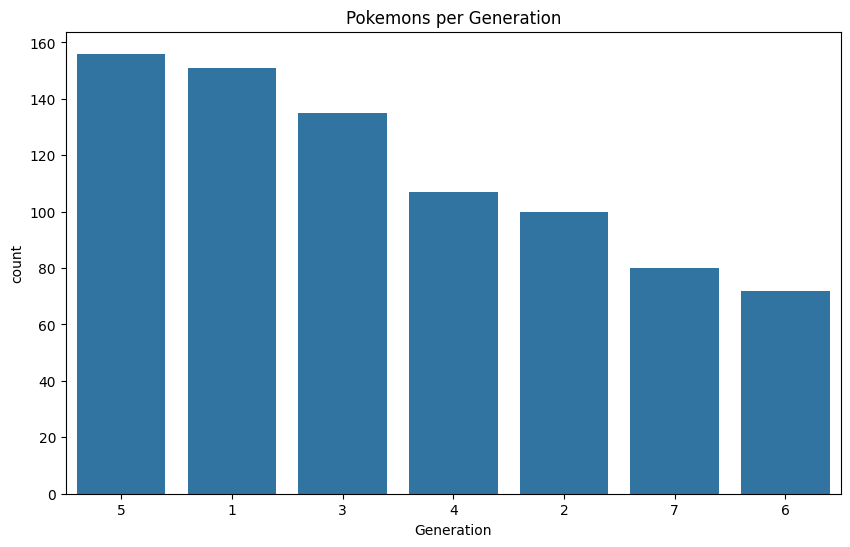

In [356]:
plt.figure(figsize=(10,6))
sns.countplot(data=pokemon, x = "Generation", order=pokemon["Generation"].value_counts().index)
plt.title("Pokemons per Generation")

([<matplotlib.axis.XTick at 0x1c865f17170>,
 [Text(0, 0, 'Non-Legendary'), Text(1, 0, 'Legendary')])

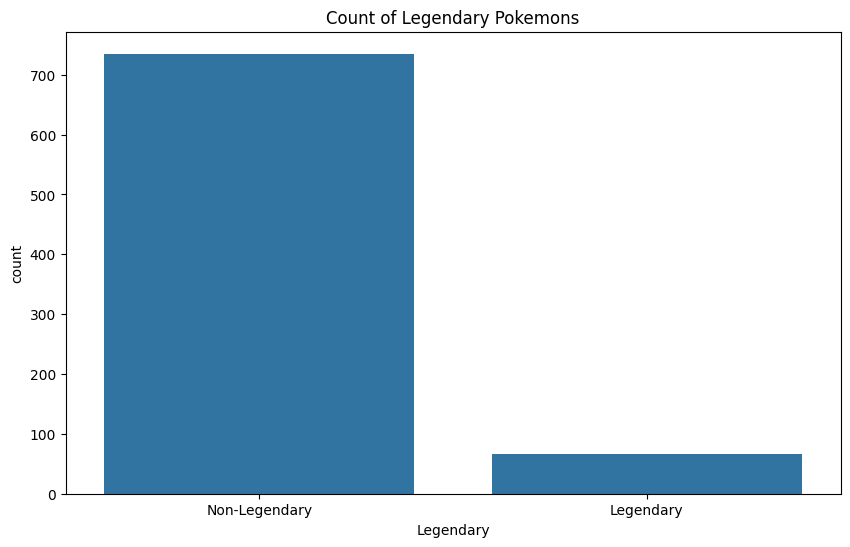

In [357]:
plt.figure(figsize=(10,6))
sns.countplot(data=pokemon, x = "Legendary", order=pokemon["Legendary"].value_counts().index)
plt.title("Count of Legendary Pokemons")
plt.xticks(ticks=[0,1],labels=["Non-Legendary","Legendary"])

Text(0.5, 1.0, 'Legendary by Generation')

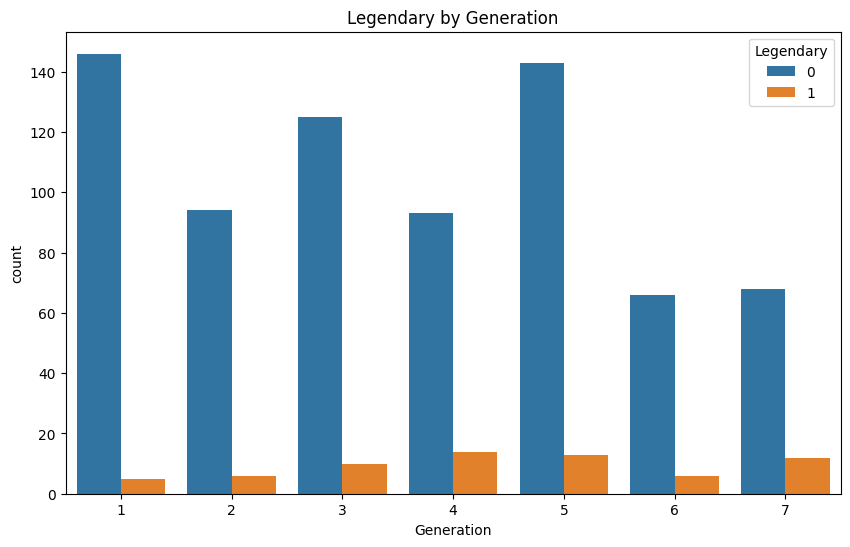

In [358]:
# Vemos como se distribuyen los legendarios segun la generacion
plt.figure(figsize=(10,6))
sns.countplot(data=pokemon, x="Generation", hue="Legendary")
plt.title("Legendary by Generation")

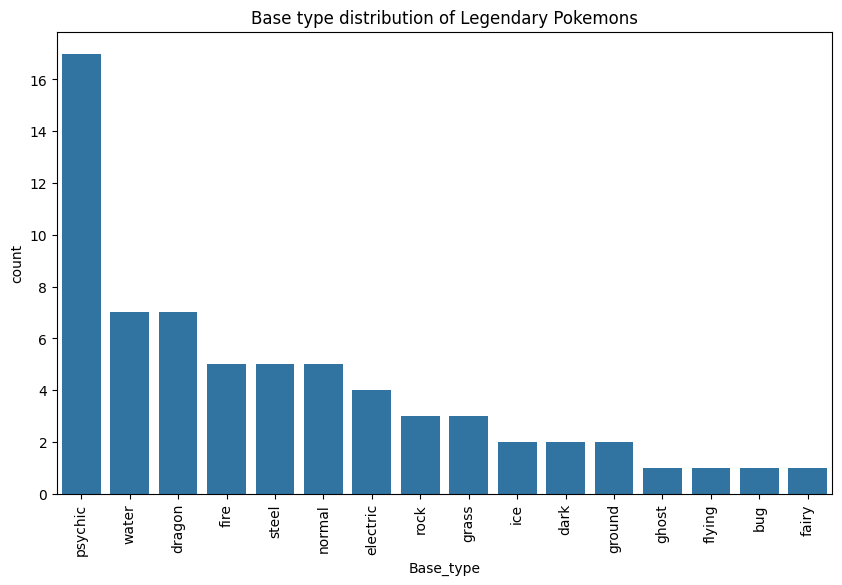

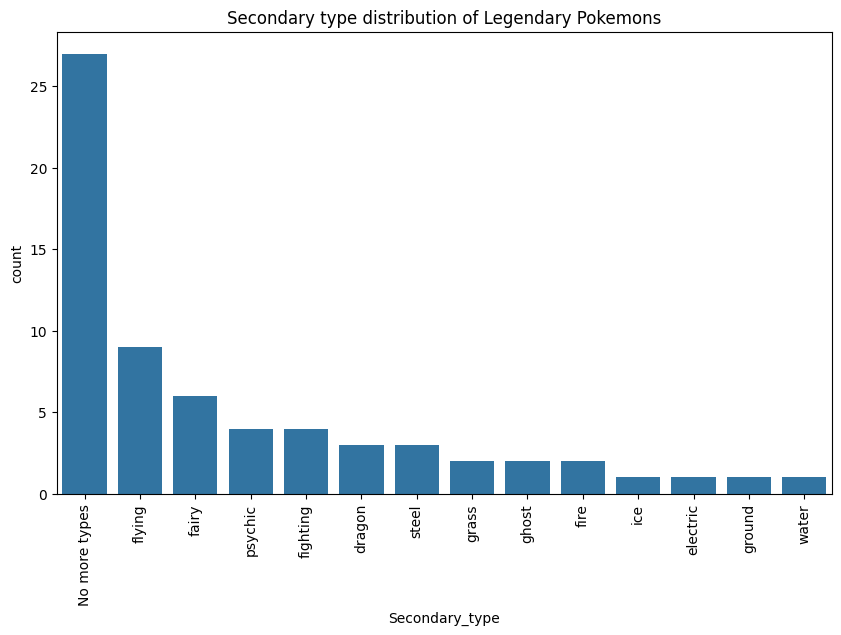

In [359]:
# Vemos como se distribuyen los legendarios segun el tipo
legends = pokemon[pokemon["Legendary"]==1]
plt.figure(figsize=(10,6))
sns.countplot(data=legends, x="Base_type", order=legends["Base_type"].value_counts().index)
plt.title("Base type distribution of Legendary Pokemons")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=legends, x="Secondary_type", order=legends["Secondary_type"].value_counts().index)
plt.title("Secondary type distribution of Legendary Pokemons")
plt.xticks(rotation=90)
plt.show()

# Se puede ver que la mayoria de legendarios son de un solo tipo

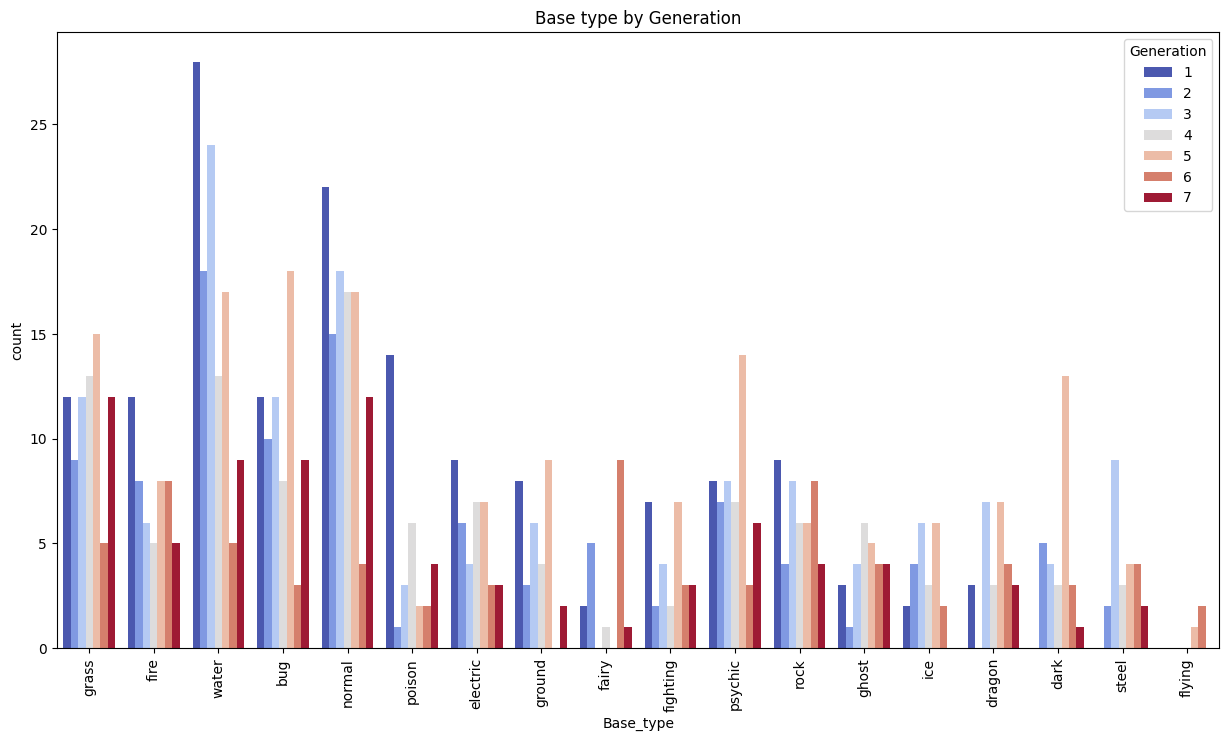

In [360]:
plt.figure(figsize=(15,8))
sns.countplot(data=pokemon, x="Base_type",hue="Generation", palette="coolwarm")
plt.title("Base type by Generation")
plt.xticks(rotation=90)
plt.show()

In [361]:
pokemon_prices["Price"]

0       5,00
2       0,25
3      14,95
5       0,70
6      48,00
       ...  
795     0,05
797     0,02
798     0,04
799     0,10
800     0,02
Name: Price, Length: 488, dtype: object

In [362]:
# Para poder convertir a float
pokemon_prices["Price"].replace(",",".",regex=True,inplace=True)

In [363]:
pokemon_prices["Price"] = pokemon_prices["Price"].astype(float)

In [364]:
pokemon_prices["Price"]

0       5.00
2       0.25
3      14.95
5       0.70
6      48.00
       ...  
795     0.05
797     0.02
798     0.04
799     0.10
800     0.02
Name: Price, Length: 488, dtype: float64

In [365]:
pokemon["Abilities"]

0      ['Overgrow', 'Chlorophyll']
1      ['Overgrow', 'Chlorophyll']
2      ['Overgrow', 'Chlorophyll']
3         ['Blaze', 'Solar Power']
4         ['Blaze', 'Solar Power']
                  ...             
796                ['Beast Boost']
797                ['Beast Boost']
798                ['Beast Boost']
799                ['Prism Armor']
800                 ['Soul-Heart']
Name: Abilities, Length: 801, dtype: object

In [ ]:
# Creamos una nueva columna con el numero de habilidades que tiene cada pokemon para pasarlo al modelo

pokemon["Number_of_Abilities"] = pokemon["Abilities"].apply(lambda x: len(list(x["Abilities"])))

TypeError: string indices must be integers, not 'str'

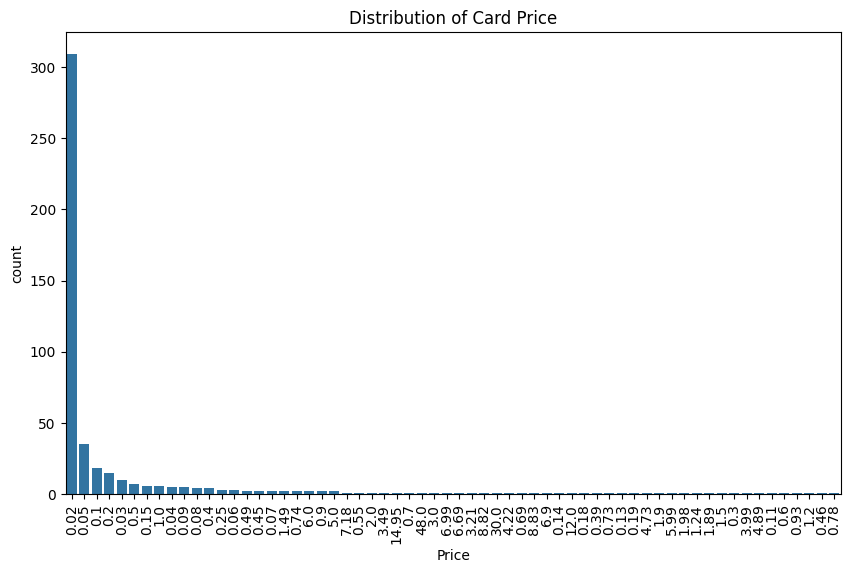

In [366]:
plt.figure(figsize=(10,6))
sns.countplot(data=pokemon_prices, x="Price", order=pokemon_prices["Price"].value_counts().index)
plt.title("Distribution of Card Price")
plt.xticks(rotation=90)
plt.show()

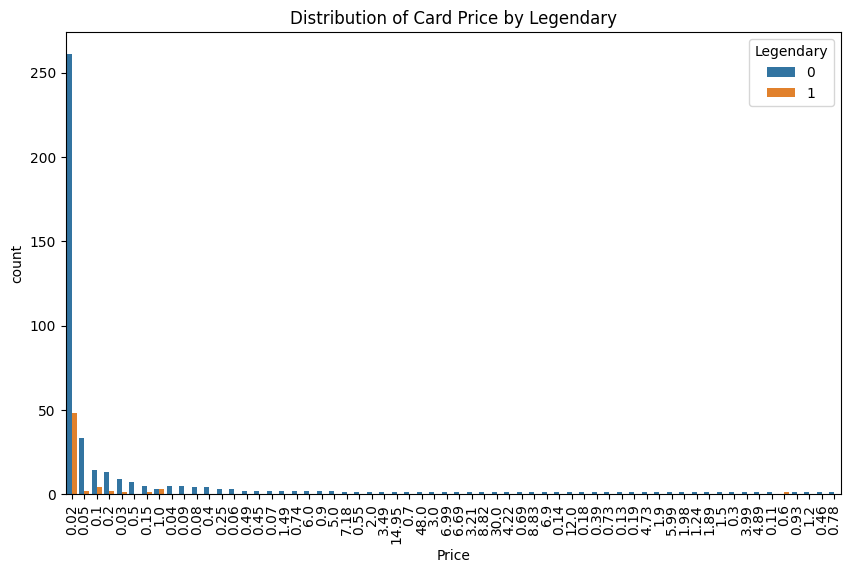

In [367]:
plt.figure(figsize=(10,6))
sns.countplot(data=pokemon_prices, x="Price",hue="Legendary", order=pokemon_prices["Price"].value_counts().index)
plt.title("Distribution of Card Price by Legendary")
plt.xticks(rotation=90)
plt.show()


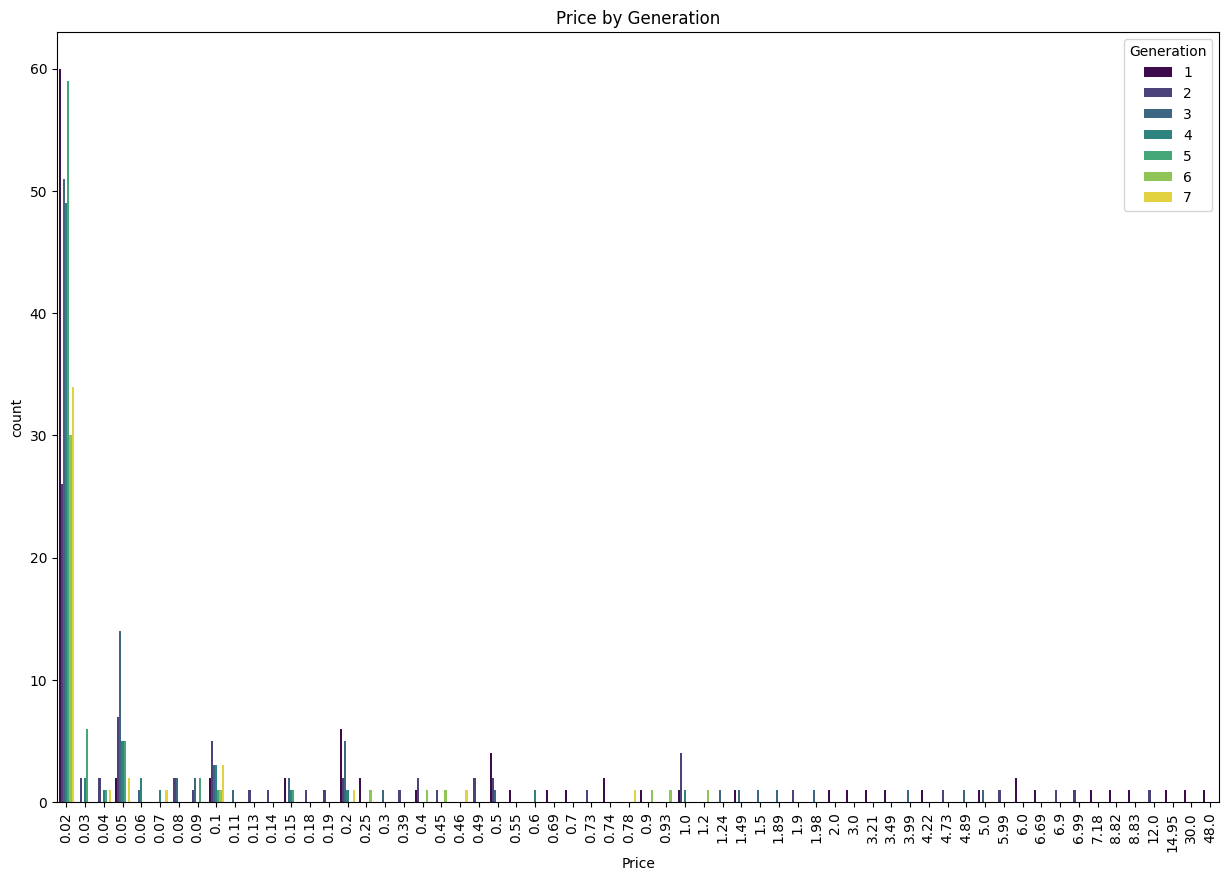

In [368]:
plt.figure(figsize=(15,10))
sns.countplot(data=pokemon_prices, x="Price",hue="Generation", palette="viridis")
plt.title("Price by Generation")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0.98, 'Price per Stats')

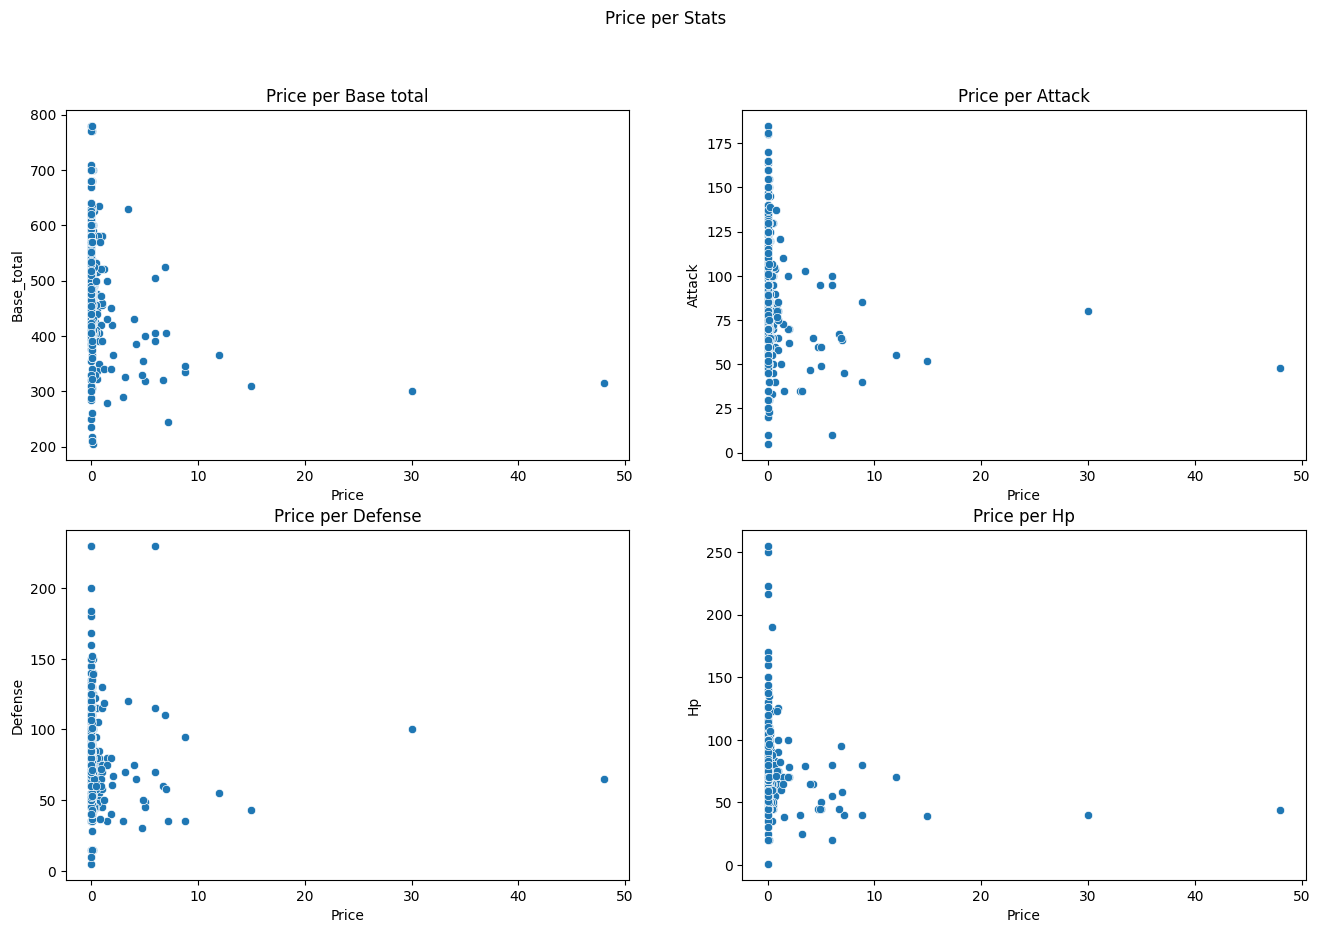

In [369]:
fig,axes= plt.subplots(2,2,figsize=(16,10))
sns.scatterplot(data=pokemon_prices, x="Price", y="Base_total", ax=axes[0, 0])
axes[0,0].set_title("Price per Base total")
sns.scatterplot(data=pokemon_prices, x="Price", y="Attack", ax=axes[0, 1])
axes[0,1].set_title("Price per Attack")
sns.scatterplot(data=pokemon_prices, x="Price", y="Defense", ax=axes[1, 0])
axes[1,0].set_title("Price per Defense")
sns.scatterplot(data=pokemon_prices, x="Price", y="Hp", ax=axes[1, 1])
axes[1,1].set_title("Price per Hp")
fig.suptitle("Price per Stats")

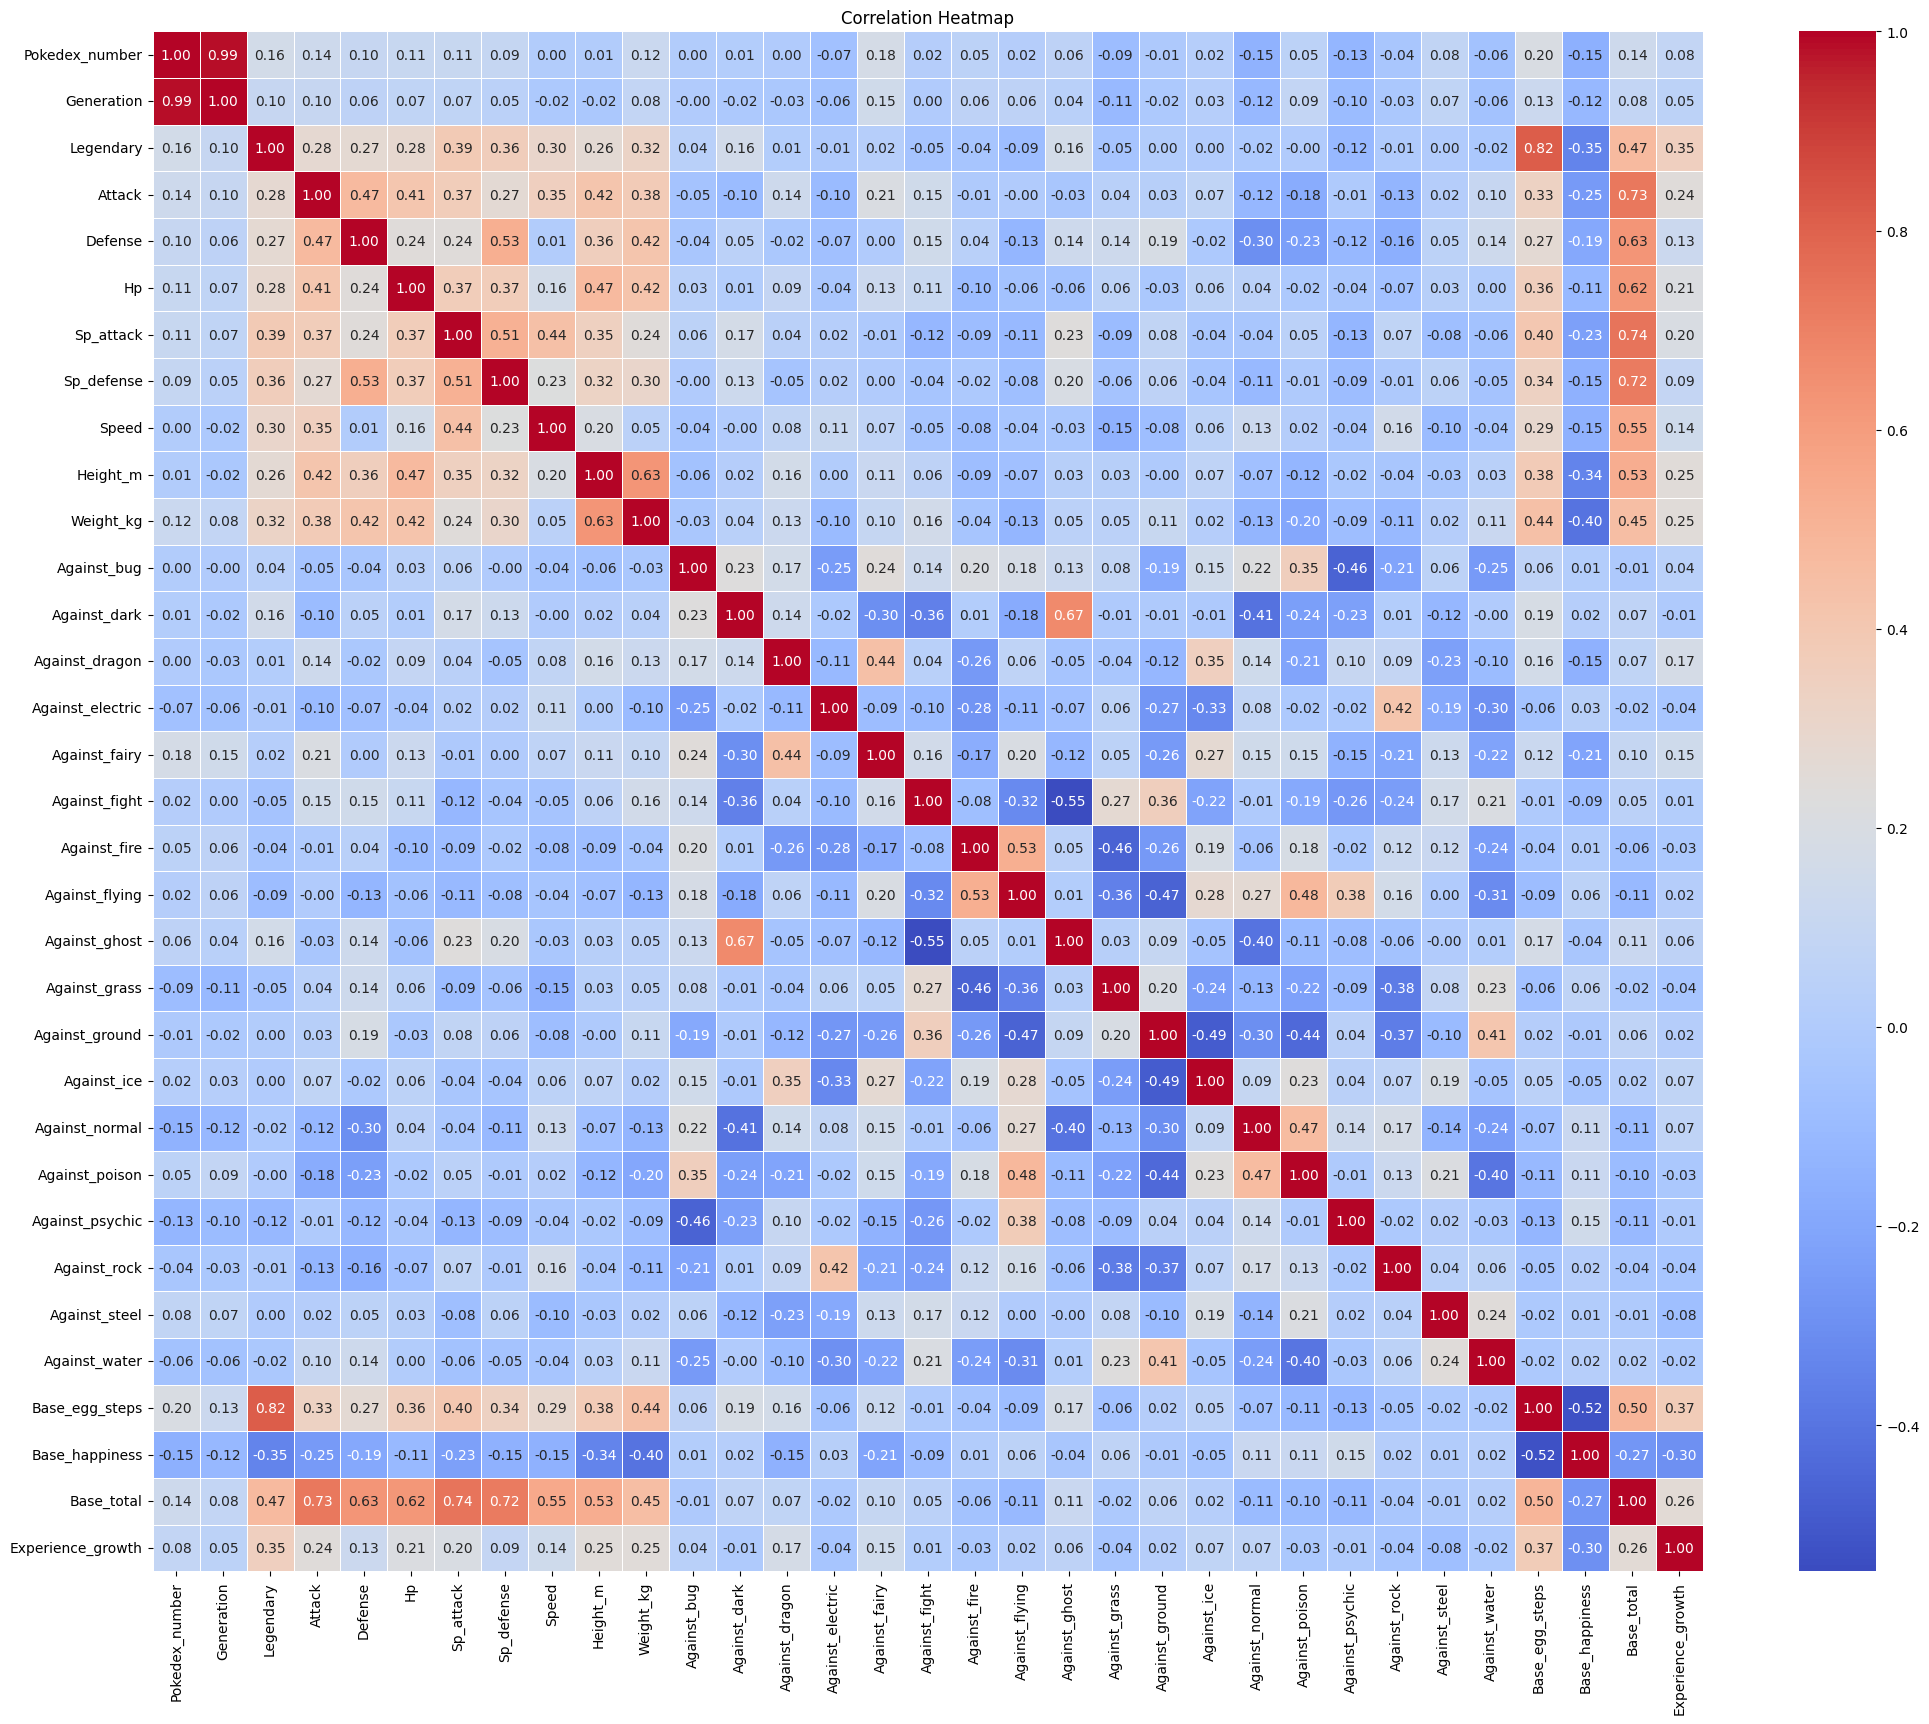

In [375]:
plt.figure(figsize=(25,20))
sns.heatmap(pokemon.corr(numeric_only=True), fmt=".2f",annot=True, cmap="coolwarm", linewidths=0.5).set_title("Correlation Heatmap")
plt.show()

In [372]:
# separamos en dos dataframes para tener menos datos

vs = []
resto = []

for i in pokemon.columns:
    if "Against" in i:
        vs.append(i)
    else:
        resto.append(i)

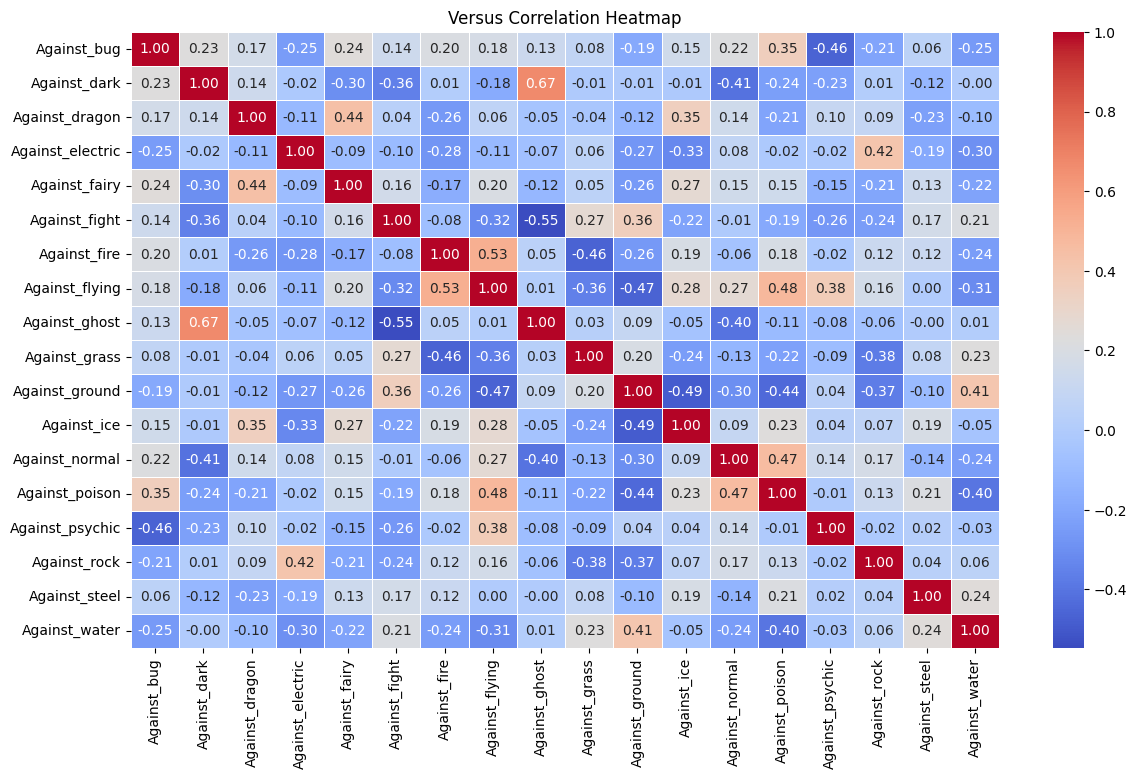

In [376]:
# Heatmap de los versus

plt.figure(figsize=(14,8))
sns.heatmap(pokemon[vs].corr(numeric_only=True), fmt=".2f",annot=True, cmap="coolwarm", linewidths=0.5).set_title("Versus Correlation Heatmap")
plt.show()

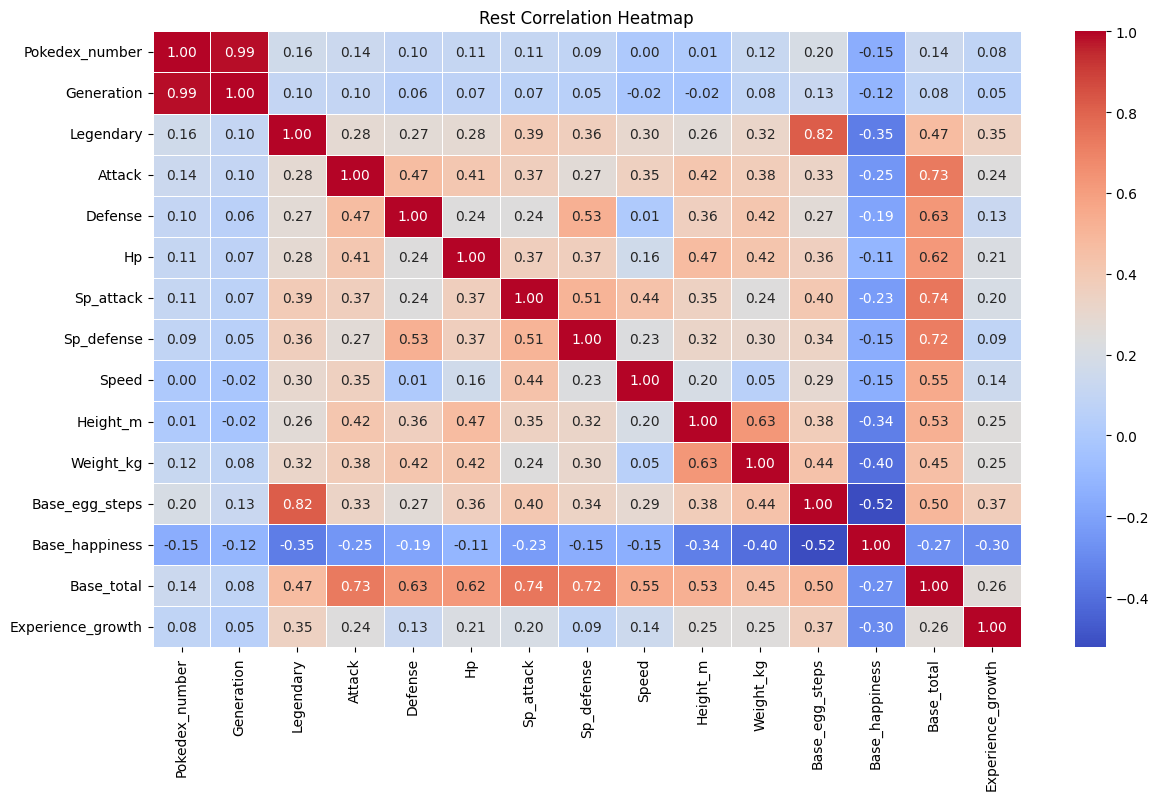

In [377]:
# Heatmap del resto de variables

plt.figure(figsize=(14,8))
sns.heatmap(pokemon[resto].corr(numeric_only=True), fmt=".2f",annot=True, cmap="coolwarm", linewidths=0.5).set_title("Rest Correlation Heatmap")
plt.show()

In [241]:
lengedaries = pokemon[['Generation', 'Legendary', 'Attack', 'Defense', 'Weight_kg', 'Height_m'
       'Hp', 'Sp_attack', 'Sp_defense', 'Speed','Base_egg_steps', 'Base_happiness', 'Base_total','Number_of_Abilities']]

In [242]:
# Split data para train y test de los legendarios

X = lengedaries.drop(columns="Legendary",axis=1)
Y = lengedaries["Legendary"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


In [243]:
# Normalizamos para poder usarlo en modelos como Logisitic o SVM
scaler = StandardScaler()

# Fitting

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)




ValueError: could not convert string to float: 'Garchomp'

In [ ]:
# Check de modelos para prediccion de legendario. Miramos: KNN Regressor y logisitic, ya que tiene que ser un clasificador.

# Logisitic Regression

model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)
model.score(X_test,y_test)

# KNN Regressor
# for loop para probar numero de neighbours
# AML GROUP ASIGNMENT PROJECT EN EL REPO DE BERNARDO
knn_reg = KNeighborsRegressor(n_neighbors=15, weights='distance', metric="manhattan")  # n_neighbors=5 y pesos basados en la distancia
# Neighbors= Vecinos que se escogen para predecir. 
# Weights: puede ser distance o uniform, según si la importancia de los vecinos es igual o depende de cuánto de cerca esté
# Metric: Cómo se evalúa la distancia entre puntos. minkowski, manhattan, euclidean son los más comunes
knn_reg.fit(X_train, y_train)

# Predicciones para el test
y_pred = knn_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# modelo SVR con kernel 'rbf' (para no linealidad). Puede ser 'linear', o 'poly'. 
# Para no lineal también se usa "sigmoid" para relaciones logísticas
svr = SVR(kernel='linear', C=10, epsilon=0.1) 
# C: Bajo vs alto: General (suave) o Ajuste preciso (ojo overfitting). 
# Poly: degree= Controla el grado de polinomio (2, 3, 4, 5)
# Gamma (todos menos linear): Controla la influencia de cada punto. gamma baja= puntos lejanos tienen más influencia (0.01). 
#Gamma alta(1, 10): Puntos cercanos tienen más influencia. Ojo con el sobreajuste. 'scale', 'auto', o 0.01, 0.1, 1
# Epsilon: Ignorar errores. Si es alto, ignora más


svr.fit(X_train, y_train)

# Predicciones
y_pred = svr.predict(X_test)

# Evaluar el rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los coeficientes, intercepto y métricas de cada modelo
print("KNN Regressor:")
print(f'MSE (Error Cuadrático Medio): {mse:.4f}')
print(f'R2 (Coeficiente de Determinación): {r2:.4f}')

print("SVM model:")
print(f'MSE (Error Cuadrático Medio): {mse:.4f}')
print(f'R2 (Coeficiente de Determinación): {r2:.4f}')

In [ ]:
# Check de modelos para prediccion de precio. Miramos: Regresion lineal, KNN Regressor y SVM.

#Regresión Lineal Simple
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_lm = lm.predict(X_test)
mse_lm = mean_squared_error(y_test, y_pred_lm)
r2_lm = r2_score(y_test, y_pred_lm)

#Ridge (con penalización L2)

ridge = Ridge(alpha=1.0)  # alpha controla la fuerza de la penalización. Cuanto más grande sea alpha, más se encogen los coeficients. 
# alpha=0 es lo mismo que hacer lineal. Más comunes: 0.01, 0.1, 1, 10, 100
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

#Lasso (con penalización L1)
lasso = Lasso(alpha=0.1)  # alpha controla la fuerza de la penalización. Cuanto más alpha, más se polariza la insignificancia de variables. 
# alpha=0 es lo mismo que hacer lineal. Más comunes: 0.0001, 0.001, 0.01, 0.1, 1
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Mostrar los coeficientes, intercepto y métricas de cada modelo
print("Regresión Lineal:")
print(f"MSE (Error Cuadrático Medio): {mse_lm:.4f}")
print(f"R2 (Coeficiente de Determinación): {r2_lm:.4f}\n")

print("Ridge:")
print(f"MSE (Error Cuadrático Medio): {mse_ridge:.4f}")
print(f"R2 (Coeficiente de Determinación): {r2_ridge:.4f}\n")

print("Lasso:")
print(f"MSE (Error Cuadrático Medio): {mse_lasso:.4f}")
print(f"R2 (Coeficiente de Determinación): {r2_lasso:.4f}\n")

In [ ]:
# Check de modelo para la prediccion de legendarios. Miramos modelo de logistic regression y KNN. Ya que se trata de una clasifición

In [ ]:
# OBJETIVOS:
# SVM / KNN/ linear para precio
# logisitic / KNN para legendario
# sacar API y sacr algo mas de info para plotear o agrefar